###  print out structures

In [15]:
import random
import numpy as np
import pprint
from graphviz import Digraph

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [16]:
# initialize a model
nin = 2  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [3, nout], lastReLU=False, weightsinit=2, debug_bw=False
)  # 1-layer neural network
# print("parameters")
# pp.pprint(model.parameters())
print("layers")
pp.pprint(model.layers)
print(model.layers[0].layernumber)

xinumbers = list(range(7, 7 + nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
# print("inputs")
# pp.pprint(xinput)

activation = model(xinput)
activation.backward()

layernumber == L1
nonlin == False
weightsinit == 2
debug_bw == False
layernumber == L2
nonlin == False
weightsinit == 2
debug_bw == False
layers
[   Layer of [LinearNeuron(2), LinearNeuron(2), LinearNeuron(2)],
    Layer of [LinearNeuron(3)]]
L1


In [17]:
def print_my_params(model):
        # print(model.layers)

        for l in model.layers:
                print("layer %s" % l.layernumber)
                # pp.pprint(l.parameters())
                for n in l.neurons:
                        print("neuron %s" % n.neuronnumber)
                        # pp.pprint(n.parameters())
                        for w in n.w:
                                # print(w)
                                print("layer %s neuron %s type %s data %.4f grad %.4f " % (l.layernumber,w.neuronnumber,w.type,w.data,w.grad))
                        print("layer %s neuron %s type %s data %.4f grad %.4f " % (l.layernumber,n.b.neuronnumber, n.b.type,n.b.data,n.b.grad))

print_my_params(model)


layer L1
neuron n1
layer L1 neuron n1 type w1 data 0.5000 grad 2.1000 
layer L1 neuron n1 type w2 data 1.0000 grad 2.4000 
layer L1 neuron n1 type b data 0.0000 grad 0.3000 
neuron n2
layer L1 neuron n2 type w1 data 0.5000 grad 4.2000 
layer L1 neuron n2 type w2 data 1.0000 grad 4.8000 
layer L1 neuron n2 type b data 0.0000 grad 0.6000 
neuron n3
layer L1 neuron n3 type w1 data 0.6000 grad 6.3000 
layer L1 neuron n3 type w2 data 1.2000 grad 7.2000 
layer L1 neuron n3 type b data 0.0000 grad 0.9000 
layer L2
neuron n1
layer L2 neuron n1 type w1 data 0.3000 grad 11.5000 
layer L2 neuron n1 type w2 data 0.6000 grad 11.5000 
layer L2 neuron n1 type w3 data 0.9000 grad 13.8000 
layer L2 neuron n1 type b data 0.0000 grad 1.0000 


In [18]:
def draw_nn_3(model, debug_print_01=False):
    # nn_dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right
    nn_dot = Digraph(format="svg")
    for l in model.layers:

        with nn_dot.subgraph(name=l.layernumber, graph_attr={"rankdir": "TB"}) as c:
        # with nn_dot.subgraph(name="L", graph_attr={"rankdir": "TB"}) as c:
            c.attr(color="blue")
            c.node_attr["style"] = "filled"
            c.edges([("b0", "b1")])
            c.attr(label=l.layernumber)

    return nn_dot

layer L1
neuron n1
|{b |d 0.0000 g 0.3000}
neuron n2
|{b |d 0.0000 g 0.6000}
neuron n3
|{b |d 0.0000 g 0.9000}
neuron n1
layer L1 neuron n1 type w1 data 0.5000 grad 2.1000 
layer L1 neuron n1 type w2 data 1.0000 grad 2.4000 
layer L1 neuron n1 type b data 0.0000 grad 0.3000 
neuron n2
layer L1 neuron n2 type w1 data 0.5000 grad 4.2000 
layer L1 neuron n2 type w2 data 1.0000 grad 4.8000 
layer L1 neuron n2 type b data 0.0000 grad 0.6000 
neuron n3
layer L1 neuron n3 type w1 data 0.6000 grad 6.3000 
layer L1 neuron n3 type w2 data 1.2000 grad 7.2000 
layer L1 neuron n3 type b data 0.0000 grad 0.9000 
layer L2
neuron n1
|{b |d 0.0000 g 1.0000}
neuron n1
layer L2 neuron n1 type w1 data 0.3000 grad 11.5000 
layer L2 neuron n1 type w2 data 0.6000 grad 11.5000 
layer L2 neuron n1 type w3 data 0.9000 grad 13.8000 
layer L2 neuron n1 type b data 0.0000 grad 1.0000 


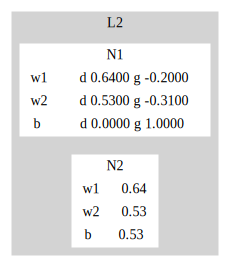

In [22]:
def draw_nn(model, debug_print_01=False):
    nn_dot = Digraph(
        format="svg", node_attr={"shape": "record"}, graph_attr={"rankdir": "LR"}
    )  # LR = left to right
    for l in model.layers:
            print("layer %s" % l.layernumber)

            with nn_dot.subgraph(name="cluster_6") as c:
                c.attr(label=l.layernumber)
                c.attr(style="filled", color="lightgrey")
                c.node_attr.update(style="filled", color="white")

                for n in l.neurons:
                    print("neuron %s" % n.neuronnumber)

                    bstring="|{b |d %.4f g %.4f}"  % ( n.b.data,n.b.grad)
                    print(bstring)
                    # c.node(
                    #     "N1",
                    #     r"  %s |{%s |d %.4f g %.4f} |{%s |d %.4f g %.4f}|{b |d %.4f g %.4f}"
                    #     % ("N1", "w1", 0.64, -0.2, "w2", 0.53, -0.31, 0.18, 0.22),
                    # )
                    c.node(
                        "N1",
                        r"  %s |{%s |d %.4f g %.4f} |{%s |d %.4f g %.4f}%s}"
                        % ("N1", "w1", 0.64, -0.2, "w2", 0.53, -0.31, bstring),
                    )
                    c.node("N2", r"  N2 |{w1 | 0.64} |{w2 | 0.53}|{b | 0.53}")



            for n in l.neurons:
                    print("neuron %s" % n.neuronnumber)
                    for w in n.w:
                            print("layer %s neuron %s type %s data %.4f grad %.4f " % (l.layernumber,w.neuronnumber,w.type,w.data,w.grad))
                    print("layer %s neuron %s type %s data %.4f grad %.4f " % (l.layernumber,n.b.neuronnumber, n.b.type,n.b.data,n.b.grad))

    return nn_dot

draw_nn(model)

layer L1
neuron n1
|{b |d 0.1800 g 0.2200}
neuron n2
|{b |d 0.1800 g 0.2200}
neuron n3
|{b |d 0.1800 g 0.2200}
neuron n1
layer L1 neuron n1 type w1 data 0.5000 grad 2.1000 
layer L1 neuron n1 type w2 data 1.0000 grad 2.4000 
layer L1 neuron n1 type b data 0.0000 grad 0.3000 
neuron n2
layer L1 neuron n2 type w1 data 0.5000 grad 4.2000 
layer L1 neuron n2 type w2 data 1.0000 grad 4.8000 
layer L1 neuron n2 type b data 0.0000 grad 0.6000 
neuron n3
layer L1 neuron n3 type w1 data 0.6000 grad 6.3000 
layer L1 neuron n3 type w2 data 1.2000 grad 7.2000 
layer L1 neuron n3 type b data 0.0000 grad 0.9000 
layer L2
neuron n1
|{b |d 0.1800 g 0.2200}
neuron n1
layer L2 neuron n1 type w1 data 0.3000 grad 11.5000 
layer L2 neuron n1 type w2 data 0.6000 grad 11.5000 
layer L2 neuron n1 type w3 data 0.9000 grad 13.8000 
layer L2 neuron n1 type b data 0.0000 grad 1.0000 


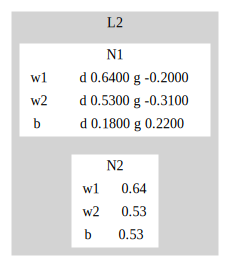

In [20]:
# draw_dot(activation, debug_print_01=False)
draw_nn(model)